
# Fetching Forex Rates

Fetching historical daily rates for **AUDUSD** (Austarlian Dollar / US Dollar).

Using [AlphaVantage Service](https://alphavantage.co) and [alpha_vantage package](https://github.com/RomelTorres/alpha_vantage/).

## Prepare API Keys

Firstly, [get an API Key from AlphaVantage](https://www.alphavantage.co/support/#api-key). 
Secondly, [Set & Get API Keys from environment variable](https://stackoverflow.com/a/5971326/3381997). 


In [5]:
import os, sys

api_key = "6Z16V2GZLU7N0RKG"
try:  
   api_key = os.environ["ALPHAVANTAGE_API_KEY"]
   print("Found AlphaVantage API Key")
except KeyError: 
   print("Please set the environment variable ALPHAVANTAGE_API_KEY")
   sys.exit(1)

Please set the environment variable ALPHAVANTAGE_API_KEY


SystemExit: 1


## Getting Data via REST API

For more info, please visit [AlphaVantage Docs](https://www.alphavantage.co/documentation/).

### Getting Data


In [9]:

import pandas as pd
import requests, io

base_url = 'https://www.alphavantage.co'
api_function = 'FX_DAILY'
from_symbol = 'NZD' # Base
to_symbol = 'USD' # Pricing
data_type = 'csv'
output_size = 'full'

# Building api_url
api_url = '{}/query?function={}&from_symbol={}&to_symbol={}&outputsize={}&apikey={}&datatype={}'.format(base_url,
                                                                                                        api_function,
                                                                                                        from_symbol,
                                                                                                        to_symbol,
                                                                                                        api_key,
                                                                                                        output_size,
                                                                                                        data_type)

# Getting Data
raw_data = requests.get(api_url)
forex_csv = raw_data.content
forex_df = pd.read_csv(io.StringIO(forex_csv.decode('utf-8')))


### Processing Data


In [10]:

forex_df['pre_close'] = forex_df.close.shift(-1)
forex_df['p_change'] = (forex_df.close / forex_df.pre_close - 1) # Raw percentage change
forex_df['pip_change'] = (forex_df.close / forex_df.pre_close - 1) * 10000 # Pip Change (Percentage of a Point)
forex_df.head()

,timestamp,open,high,low,close,pre_close,p_change,pip_change
0,2019-06-19,0.6527,0.6539,0.6510,0.6525,0.6531,-0.000919,-9.186955
1,2019-06-18,0.6497,0.6538,0.6486,0.6531,0.6497,0.005233,52.331845
2,2019-06-17,0.6494,0.6515,0.6489,0.6497,0.6493,0.000616,6.160481
3,2019-06-16,0.6487,0.6502,0.6487,0.6493,0.6490,0.000462,4.622496
4,2019-06-14,0.6560,0.6562,0.6484,0.6490,0.6560,-0.010671,-106.707317



### Sorting Data


In [11]:

# Sorting Data by dates
forex_df = forex_df.sort_values('timestamp', ascending=True) 
forex_df = forex_df.iloc[1:]

# Save & Print
forex_df.to_csv('../gen/{}{}_Daily_df.csv'.format(from_symbol, to_symbol))
forex_df.head()


,timestamp,open,high,low,close,pre_close,p_change,pip_change
4998,2001-07-30,0.4119,0.4140,0.4104,0.4120,0.4116,0.000972,9.718173
4997,2001-07-31,0.4120,0.4130,0.4090,0.4121,0.4120,0.000243,2.427184
4996,2001-08-01,0.4122,0.4189,0.4104,0.4184,0.4121,0.015288,152.875516
4995,2001-08-02,0.4182,0.4191,0.4158,0.4182,0.4184,-0.000478,-4.780115
4994,2001-08-03,0.4182,0.4224,0.4154,0.4181,0.4182,-0.000239,-2.391200



## Getting Data via `alpha_vantage` package

Getting data via REST API can get messy sometime. Instead, We can use `alpha_vantage` package to get this done easily.

Visit [`alpha_vantage` Docs](https://github.com/RomelTorres/alpha_vantage/). 


In [16]:

from alpha_vantage.foreignexchange import ForeignExchange
import matplotlib.pyplot as plt

fx = ForeignExchange(key=api_key, 
                     output_format='pandas',
                     indexing_type='date')
data_df, meta_data = fx.get_currency_exchange_daily(from_symbol=from_symbol,
                                                      to_symbol=to_symbol,
                                                      outputsize=output_size)
data_df = data_df.sort_values('date', ascending=True)

# Save & Print
print("meta_data: {}".format(meta_data))
data_df.head()


meta_data: {'1. Information': 'Forex Daily Prices (open, high, low, close)', '2. From Symbol': 'USD', '3. To Symbol': 'CAD', '4. Output Size': 'Full size', '5. Last Refreshed': '2019-06-19 11:05:00', '6. Time Zone': 'GMT+8'}


,1. open,2. high,3. low,4. close
date,,,,
2001-08-02,1.5364,1.5371,1.5292,1.5292
2001-08-03,1.5364,1.5371,1.5292,1.5292
2001-08-06,1.5298,1.5304,1.5251,1.5251
2001-08-07,1.5252,1.5356,1.5230,1.5354
2001-08-08,1.5351,1.5358,1.5302,1.5343



## Plotting Data

Plotting close data.


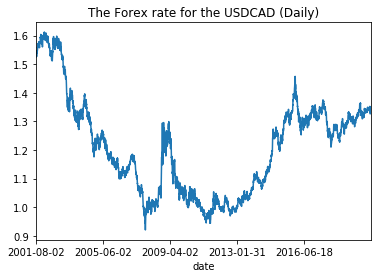

In [20]:

data_df['4. close'].plot()
plt.title('The Forex rate for the {}{} (Daily)'.format(from_symbol, to_symbol))
plt.show()


Daily pip Change for USDCAD since 2001-05-11


count    4999.000000
mean       -0.000012
std         0.005494
min        -0.039270
25%        -0.002892
50%         0.000000
75%         0.002780
max         0.034622
Name: p_change, dtype: float64

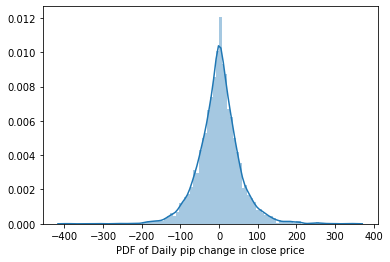

In [19]:
import seaborn as sns

sns.distplot(forex_df.pip_change,
             axlabel="PDF of Daily pip change in close price",
             bins=100)
print("Daily pip Change for {}{} since 2001-05-11".format(from_symbol, to_symbol))
forex_df.p_change.describe()